<a href="https://colab.research.google.com/github/vini-queiroz/python_data_science/blob/main/Aula_04_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dia 1: 36.5 °C
Dia 2: 17.2 °C
Dia 3: 25.3 °C
Dia 4: 22.1 °C
Dia 5: 25.7 °C
Média das temperaturas foi de : 25.4 °C
Dia mais quente: Dia 1 com 36.5 °C


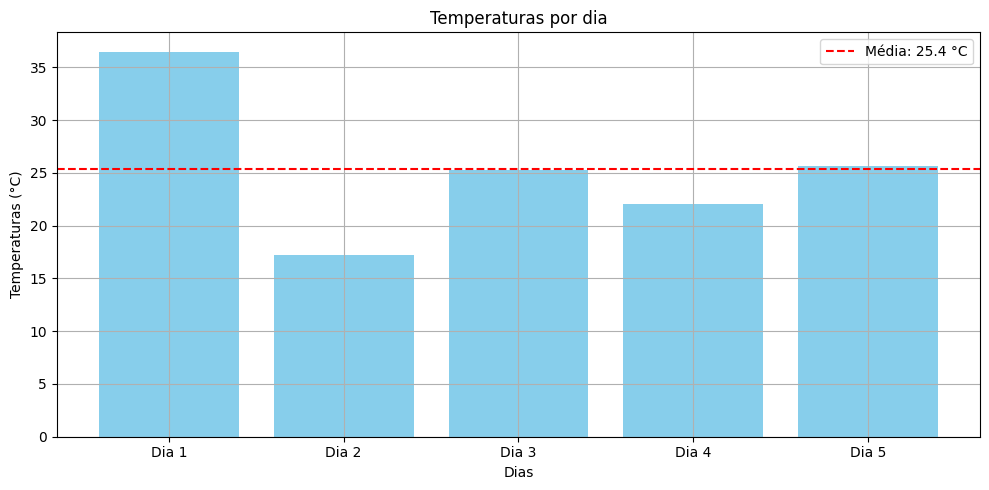

In [4]:
import random
import matplotlib.pyplot as plt

# Simular a coleta de temperatura por 5 dias
temperaturas = []

for dia in range(1,6):
    temp = round(random.uniform(10.0, 37.0), 1) # temperatura variando entre 10 e 37 graus
    temperaturas.append(temp)
    print(f'Dia {dia}: {temp} °C')

# Calcular média das temperaturas
media = sum(temperaturas) / len(temperaturas)
print(f'Média das temperaturas foi de : {media:.1f} °C')

# Identificar dia mais quente

dia_mais_quente = temperaturas.index(max(temperaturas)) + 1  # Utilizamos o index para que o programa retorne a posição do dia mais quente e somamos a 1 para representar o dia medido
print(f'Dia mais quente: Dia {dia_mais_quente} com {max(temperaturas)} °C')

# Gerar o gráfico de barras

dias = [f'Dia {i}' for i in range(1,6)]
plt.figure(figsize = (10, 5))
plt.bar(dias, temperaturas, color = 'skyblue')
plt.title('Temperaturas por dia')
plt.xlabel('Dias')
plt.ylabel('Temperaturas (°C)')
plt.axhline(media, color= 'red', linestyle = '--', label = f'Média: {media:.1f} °C')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### - Exercicio 02

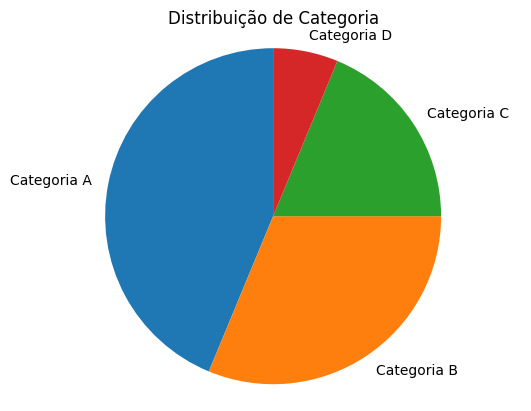

In [15]:
import numpy as np

y = np.array([35,25,15,5])
labels = ['Categoria A', 'Categoria B', 'Categoria C', 'Categoria D']
plt.pie(y, labels = labels, startangle=90)
plt.title('Distribuição de Categoria')
plt.axis('equal')
plt.show()

### Pandas

In [18]:
import pandas as pd

df = pd.read_csv('/data.csv')

In [32]:
df.head()
#df.describe()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [27]:
max_pulse = df.max()
print(max_pulse)

Duration     300.0
Pulse        159.0
Maxpulse     184.0
Calories    1860.4
dtype: float64


In [28]:
dataset = {
    'carros':['BMW', 'VOLVO', 'FORD', 'VW', 'HYUNDAI'],
    'passageiro': [4, 7, 3, 2, 8]
}
minha_var = pd.DataFrame(dataset)
print(minha_var)

    carros  passageiro
0      BMW           4
1    VOLVO           7
2     FORD           3
3       VW           2
4  HYUNDAI           8


In [37]:
a = [1, 7, 2]
var = pd.Series(a, index=['x', 'y', 'z'])
print(var['z'])

2


In [39]:
calorias = {'Segunda': 460, 'Terça': 390, 'Quarta': 370, 'Quinta': 350, 'Sexta': 380 }
var = pd.Series(calorias, index = ['Segunda', 'Sexta'])

print(var)

Segunda    460
Sexta      380
dtype: int64


In [42]:
data={
  'calorias' : [460, 390, 370, 350, 380],
  'duracao' : [50, 40, 30, 25, 42]
}

var = pd.DataFrame(data)
print(var.loc[[0,3]])
#print(var)

   calorias  duracao
0       460       50
3       350       25


In [46]:
data={
  'calorias' : [460, 390, 370, 350, 380],
  'duracao' : [50, 40, 30, 25, 42]
}

var = pd.DataFrame(data, index = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta' ])
#print(var.loc[[0,3]])
print(var)

         calorias  duracao
Segunda       460       50
Terça         390       40
Quarta        370       30
Quinta        350       25
Sexta         380       42


In [51]:
# Importar bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# 1️⃣ Ler os dados (aqui supondo que estão em um CSV)
df = pd.read_csv('/data.csv')

# 2️⃣ Verificar valores nulos
print("Valores nulos por coluna:")
print(df.isnull().sum())

# 3️⃣ Separar os dados
# Linhas com calorias conhecidas (para treino)
df_train = df[df["Calories"].notnull()]
# Linhas com calorias faltantes (para predição)
df_missing = df[df["Calories"].isnull()]

# 4️⃣ Definir variáveis de entrada (X) e saída (y)
X = df_train[["Duration", "Pulse", "Maxpulse"]]
y = df_train["Calories"]

# 5️⃣ Separar treino e teste (para avaliar o modelo)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6️⃣ Treinar o modelo (Random Forest Regressor)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 7️⃣ Avaliar o modelo
y_pred = model.predict(X_test)
print("\nDesempenho do modelo:")
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

# 8️⃣ Prever as calorias faltantes
if not df_missing.empty:
    X_missing = df_missing[["Duration", "Pulse", "Maxpulse"]]
    predicted_calories = model.predict(X_missing)
    df.loc[df["Calories"].isnull(), "Calories"] = predicted_calories

# 9️⃣ Verificar se as calorias foram preenchidas
print("\nDados após preencher calorias:")
print(df.to_string())

Valores nulos por coluna:
Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

Desempenho do modelo:
R²: 0.7370795132338227
MAE: 46.826446428571366

Dados após preencher calorias:
     Duration  Pulse  Maxpulse     Calories
0          60    110       130   409.100000
1          60    117       145   479.000000
2          60    103       135   340.000000
3          45    109       175   282.400000
4          45    117       148   406.000000
5          60    102       127   300.500000
6          60    110       136   374.000000
7          45    104       134   253.300000
8          30    109       133   195.100000
9          60     98       124   269.000000
10         60    103       147   329.300000
11         60    100       120   250.700000
12         60    106       128   345.300000
13         60    104       132   379.300000
14         60     98       123   275.000000
15         60     98       120   215.200000
16         60    100       120   300.000000
17         

Valores nulos por coluna:
Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

📊 Avaliação do Modelo:
R² (coeficiente de determinação): 0.8665
MAE (erro absoluto médio): 42.05

Coeficientes do modelo:
   Variável  Coeficiente
0  Duration     5.791171
1     Pulse     1.670983
2  Maxpulse     1.929512
Intercepto: -435.54


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


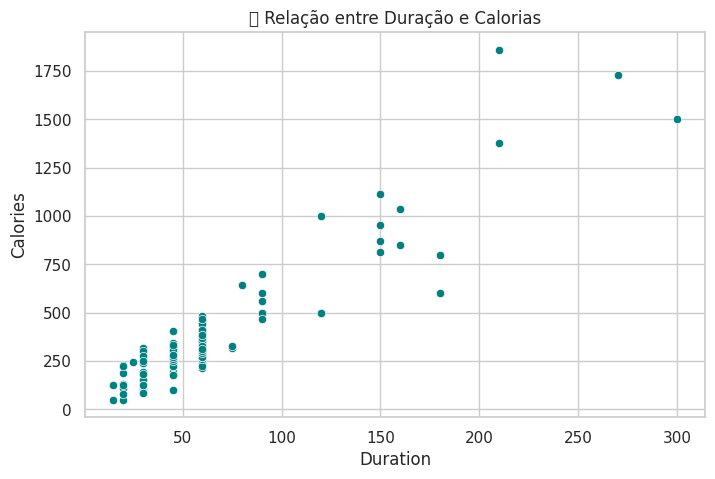

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128147 (\N{BEATING HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


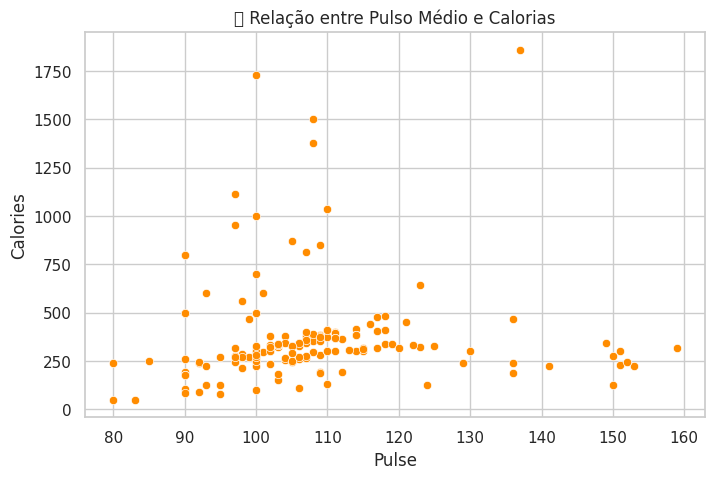

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


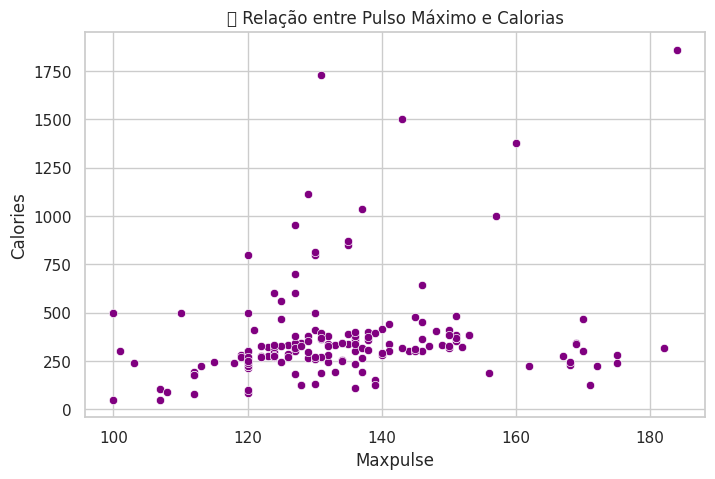


✅ Amostra dos dados após preenchimento:
     Duration  Pulse  Maxpulse     Calories
0          60    110       130   409.100000
1          60    117       145   479.000000
2          60    103       135   340.000000
3          45    109       175   282.400000
4          45    117       148   406.000000
5          60    102       127   300.500000
6          60    110       136   374.000000
7          45    104       134   253.300000
8          30    109       133   195.100000
9          60     98       124   269.000000
10         60    103       147   329.300000
11         60    100       120   250.700000
12         60    106       128   345.300000
13         60    104       132   379.300000
14         60     98       123   275.000000
15         60     98       120   215.200000
16         60    100       120   300.000000
17         45     90       112   191.558317
18         60    103       123   323.000000
19         45     97       125   243.000000
20         60    108       131   36

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# ----------------------------------------------------
# 1️⃣ Carregar o DataFrame
# Se já estiver com o df carregado, pule esta etapa:
df = pd.read_csv('/data.csv')

# ----------------------------------------------------
# 2️⃣ Verificar valores nulos
print("Valores nulos por coluna:")
print(df.isnull().sum())

# ----------------------------------------------------
# 3️⃣ Separar dados para treino e predição
df_train = df[df["Calories"].notnull()]
df_missing = df[df["Calories"].isnull()]

# ----------------------------------------------------
# 4️⃣ Definir variáveis independentes (X) e dependente (y)
X = df_train[["Duration", "Pulse", "Maxpulse"]]
y = df_train["Calories"]

# ----------------------------------------------------
# 5️⃣ Dividir entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------------------------------
# 6️⃣ Criar e treinar o modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# ----------------------------------------------------
# 7️⃣ Avaliar o modelo
y_pred = model.predict(X_test)

print("\n📊 Avaliação do Modelo:")
print(f"R² (coeficiente de determinação): {r2_score(y_test, y_pred):.4f}")
print(f"MAE (erro absoluto médio): {mean_absolute_error(y_test, y_pred):.2f}")

# Mostrar os coeficientes da regressão
coef_df = pd.DataFrame({
    "Variável": ["Duration", "Pulse", "Maxpulse"],
    "Coeficiente": model.coef_
})
print("\nCoeficientes do modelo:")
print(coef_df)
print(f"Intercepto: {model.intercept_:.2f}")

# ----------------------------------------------------
# 8️⃣ Prever calorias faltantes
if not df_missing.empty:
    X_missing = df_missing[["Duration", "Pulse", "Maxpulse"]]
    predicted_calories = model.predict(X_missing)
    df.loc[df["Calories"].isnull(), "Calories"] = predicted_calories

# ----------------------------------------------------
# 9️⃣ Visualizações
sns.set(style="whitegrid")

# Relação entre duração e calorias
plt.figure(figsize=(8,5))
sns.scatterplot(x="Duration", y="Calories", data=df, color="teal")
plt.title("🔥 Relação entre Duração e Calorias")
plt.show()

# Relação entre pulso médio e calorias
plt.figure(figsize=(8,5))
sns.scatterplot(x="Pulse", y="Calories", data=df, color="darkorange")
plt.title("💓 Relação entre Pulso Médio e Calorias")
plt.show()

# Relação entre pulso máximo e calorias
plt.figure(figsize=(8,5))
sns.scatterplot(x="Maxpulse", y="Calories", data=df, color="purple")
plt.title("💪 Relação entre Pulso Máximo e Calorias")
plt.show()

# ----------------------------------------------------
# 🔟 Mostrar amostra final com calorias preenchidas
print("\n✅ Amostra dos dados após preenchimento:")
print(df.to_string())

# (Opcional) Salvar resultado
# df.to_csv("exercicio_calorias_preenchidas.csv", index=False)